In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
labels = pd.read_csv("sample_submission.csv")
x_test = pd.read_csv("test.csv")
data = pd.read_csv("train.csv")

In [4]:
np.shape(labels)

(28000, 2)

In [3]:
labels.sample()

,ImageId,Label
16930,16931,0


In [5]:
print(data.describe)

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

In [6]:
x_test.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
19959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
np.shape(x_test)

(28000, 784)

In [8]:
a = np.random.randint(10,size=10, dtype=int)

In [3]:
y_train = np.array(data).T[0]
x_train = np.array(data).T[1:]
x_train = x_train/255

x_test = np.array(x_test).T/255
x_train.shape

(784, 42000)

In [10]:
np.max(y_train)

9

In [27]:
def init_param():
    w1 = np.random.rand(70,784)-0.5
    b1 = np.random.rand(70,1)-0.5
    w2 = np.random.rand(30,50)-0.5
    b2 = np.random.rand(30,1)-0.5
    w3 = np.random.rand(10,30)-0.5
    b3 = np.random.rand(10,1)-0.5
    return w1,b1,w2,b2,w3,b3

def reLU(x):
    return np.maximum(x,0)

def sofmax(x):
    a = x - np.max(x,0)
    return np.exp(a)/sum(np.exp(a))

def forward_p(w1,b1,w2,b2,w3,b3,X):
    l1 = w1.dot(X)+b1
    z1 = reLU(l1)
    l2 = w2.dot(z1)+b2
    z2 = reLU(l2)
    l3 = w3.dot(z2)+b3
    z3 = sofmax(l3)
    return l1,z1,l2,z2,l3,z3

def deriv_reLU(x):
    return x > 0

def one_hot(y):
    Y = np.zeros((y.max()+1,y.size))
    Y[y,np.arange(y.size)] = 1
    return Y

def back_p(l1,z1,w2,l2,z2,w3,z3,X,Y):
    n = np.size(Y)
    Y = one_hot(Y)
    dz3 = z3-Y
    dw3 = 1/n*dz3.dot(z2.T)
    db3 = 1/n*np.sum(dz3)
    dz2 = w3.T.dot(dz3) * deriv_reLU(l2)
    dw2 = 1/n*dz2.dot(z1.T)
    db2 = 1/n*np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_reLU(l1)
    dw1 = 1/n*dz1.dot(X.T)
    db1 = 1/n*np.sum(dz1)
    return dw1,db1,dw2,db2,dw3,db3

def adj_param(db1,dw1,db2,dw2,db3,dw3,w1,b1,w2,b2,w3,b3,rate):
    w1 = w1 - dw1*rate
    b1 = b1 - db1*rate
    w2 = w2 - dw2*rate
    b2 = b2 - db2*rate
    w3 = w3 - dw3*rate
    b3 = b3 - db3*rate
    return w1,b1,w2,b2,w3,b3

In [22]:
def get_predictions(z3):
    return np.argmax(z3,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,iterations,rate):
    w1,b1,w2,b2,w3,b3 = init_param()
    for i in range(iterations):
        l1,z1,l2,z2,l3,z3 = forward_p(w1,b1,w2,b2,w3,b3,X)
        dw1,db1,dw2,db2,dw3,db3 = back_p(l1,z1,w2,l2,z2,w3,z3,X,Y)
        w1,b1,w2,b2,w3,b3 = adj_param(db1,dw1,db2,dw2,db3,dw3,w1,b1,w2,b2,w3,b3,rate)
        if i%20 == 0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_predictions(z3),Y))
    return w1,b1,w2,b2,w3,b3

In [20]:
np.size(y_train)

42000

In [26]:
w1,b1,w2,b2,w3,b3 = gradient_descent(x_train,y_train,501,0.1)

Iteration:  0
[3 5 4 ... 6 5 9] [1 0 1 ... 7 6 9]
Accuracy:  0.05961904761904762
Iteration:  20
[8 0 1 ... 4 0 8] [1 0 1 ... 7 6 9]
Accuracy:  0.4700952380952381
Iteration:  40
[8 0 1 ... 7 0 8] [1 0 1 ... 7 6 9]
Accuracy:  0.6217857142857143
Iteration:  60
[1 0 1 ... 7 0 8] [1 0 1 ... 7 6 9]
Accuracy:  0.7001190476190476
Iteration:  80
[1 0 1 ... 7 0 8] [1 0 1 ... 7 6 9]
Accuracy:  0.7443095238095238
Iteration:  100
[1 0 1 ... 7 6 8] [1 0 1 ... 7 6 9]
Accuracy:  0.7733333333333333
Iteration:  120
[1 0 1 ... 7 6 8] [1 0 1 ... 7 6 9]
Accuracy:  0.7945
Iteration:  140
[1 0 1 ... 7 6 8] [1 0 1 ... 7 6 9]
Accuracy:  0.8107142857142857
Iteration:  160
[1 0 1 ... 7 6 8] [1 0 1 ... 7 6 9]
Accuracy:  0.8232380952380952
Iteration:  180
[1 0 1 ... 7 6 8] [1 0 1 ... 7 6 9]
Accuracy:  0.8331190476190476
Iteration:  200
[1 0 1 ... 7 6 8] [1 0 1 ... 7 6 9]
Accuracy:  0.841
Iteration:  220
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8476904761904762
Iteration:  240
[1 0 1 ... 7 6 9] [1 0 1 ... 7

In [41]:
def make_predictions(X, W1, b1, W2, b2):
    _,_,_,_,_,z3 = forward_p(w1,b1,w2,b2,w3,b3,X)
    predictions = get_predictions(z3)
    return predictions

def test_prediction(index, w1, b1, w2, b2, W3, b3):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


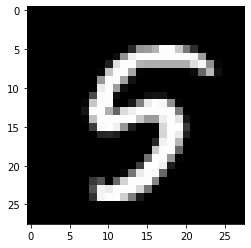

Prediction:  [8]
Label:  8


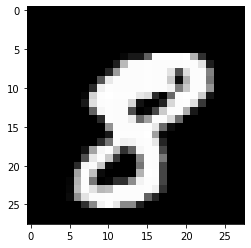

Prediction:  [1]
Label:  1


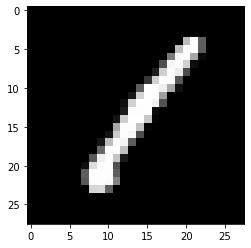

Prediction:  [0]
Label:  0


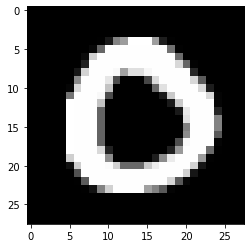

In [42]:
test_prediction(8, w1,b1,w2,b2,w3,b3)
test_prediction(10, w1,b1,w2,b2,w3,b3)
test_prediction(0, w1,b1,w2,b2,w3,b3)
test_prediction(4, w1,b1,w2,b2,w3,b3)

In [ ]:
dev_predictions = make_predictions(x_test, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_test)